## Introdução a Reconhecimento de Padrões
# Exercício 1: KNN (K Nearest Neighbours)

*Diogo Muzzi Mortimer - 2022055394*

O KNN um algoritmo de classificação simples e eficiente que classifica novas amostras a partir da medida de similaridade e distância com as amostras armazenadas no treinamento. Para isso, ele utiliza a distância de Minkowski como métrica de distância:

$\delta_{mink} = (\sum_{k=1}^{n}|x_{ik}-x_{jk}|^p)^{\frac{1}{p}}$

Com duas classes, o KNN classifica baseado no sinal da soma das distâncias aos N (ímpar) vizinhos mais próximos. 

$Classe(x_j) = sign(\sum_{i=1}^{k}y_i)\forall x_i \in V_k$

## Parte 1: Implementação do KNN

Utilizando os conceitos explorados anteriormente, foi criada a seguinte classe para implementar o KNN:

In [215]:
import numpy as np
class myKNN:
    def __init__(self, X_train: np.ndarray, Y_train: np.ndarray) -> None:
        """
        Classe que implementa o algoritmo KNN.
        
        Parameters:
        X_train: Data matrix

        Y_train: Labels vector
        """
        self.data = X_train.copy()
        self.labels = Y_train.flatten().copy()
    
    def euclid_dist(self, point1: np.ndarray, point2: np.ndarray) -> float:
        """
        Calculates the distance between two data points.
        """
        return np.linalg.norm(point1 - point2)
    
    def find_neighbours(self, point: np.ndarray, k: int) -> list[int]:
        """Predicts the class of the given data point."""
        distances = []

        for i, data_point in enumerate(self.data):
            distances.append((i, self.euclid_dist(point, data_point)))
        
        distances.sort(key=lambda x: x[1])

        neighbours = [i for i,_ in distances[:k]]

        return neighbours
    
    def predict(self, point: np.ndarray, k: int) -> int:
        neighbors = self.find_neighbours(point, k)
        neighbor_labels = [self.labels[i] for i in neighbors]

        # Count occurrences of each label among neighbors
        label_counts = {}
        for label in neighbor_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        
        predicted_class = max(label_counts, key=label_counts.get)
        return predicted_class

## Parte 2 - Classificação de dados sintéticos com KNN

### Geração dos Dados Sintéticos variando o desvio padrão

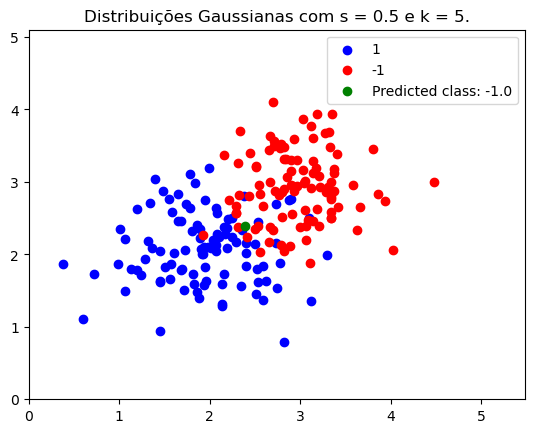

In [231]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

def plot_gaussians(N:int, s:float, k:int, point:np.ndarray) -> None:
    """
    Function to plot the gaussians and the predicted class of a point.

    Parameters:
    N: Number of samples (int)
    s: Standard deviation of the gaussian (float)
    k: Number of neighbors (int)
    point: Point to predict (np.ndarray)

    Returns: None
    """
    # Gerando os dados
    xc1 = np.random.randn(N, 2) * s + np.array([2, 2])
    xc2 = np.random.randn(N, 2) * s + np.array([3, 3])
    yc1 = np.ones((N, 1))
    yc2 = -np.ones((N, 1))
    X = np.vstack((xc1, xc2))  
    Y = np.vstack((yc1, yc2))

    # Plot dos dados
    x_max = X[:, 0].max() + 1
    y_max = X[:, 1].max() + 1
    plt.xlim(0, x_max)
    plt.ylim(0, y_max)
    plt.scatter(xc1[:, 0], xc1[:, 1], c='b', label='1')
    plt.scatter(xc2[:, 0], xc2[:, 1], c='r', label='-1')

    # Plot da predição
    knn = myKNN(X,Y)
    point_class = knn.predict(point, k)
    plt.scatter(point[0], point[1], c='g', label=f'Predicted class: {point_class}')
    plt.legend()
    plt.title(f'Distribuições Gaussianas com s = {s} e k = {k}.')

    return X, Y, knn

x = np.random.randn(1) * 0.1 + np.array([2.5, 2.5])
X, Y, knn =  plot_gaussians(100, 0.5, 5, x)


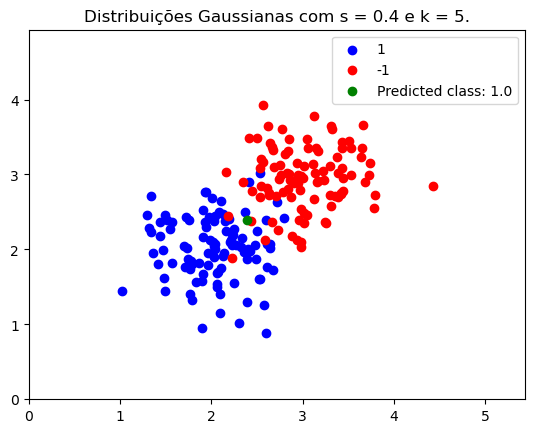

In [232]:
_ = plot_gaussians(100, 0.4, 5, x)

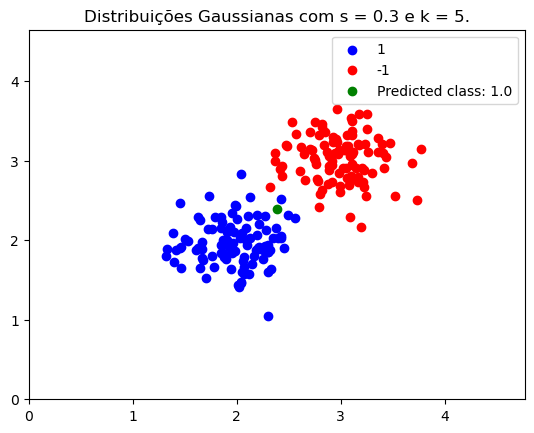

In [233]:
_ = plot_gaussians(100, 0.3, 5, x)

No primeiro exemplo, com s = 0.5, os dados possuem bastante overlap, o que faz com que o algoritmo classifique o ponto de teste como -1, mesmo que visualmente ele esteja mais perto do centro da classe +1. Já nos exemplos com s = 0.4 e s = 0.3 vemos que o algoritmo classifica o ponto de teste como esperado. 

Então, podemos dizer que o KNN funciona significativamente melhor quando os clusters das classes são bem separados. 

### Geração dos dados sintéticos variando o número de vizinhos próximos (s = 0.5)

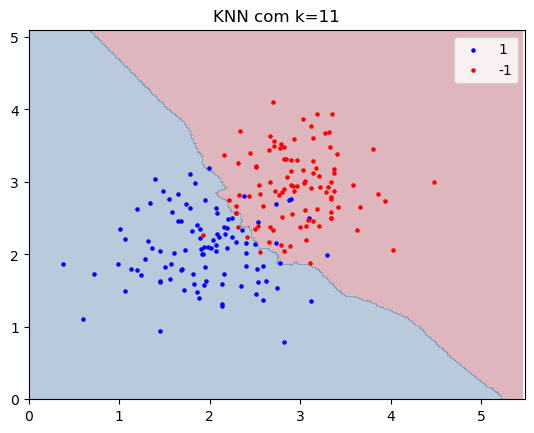

In [234]:
def knn_grid_map(X, knn, k):
    # Criação da grade de pontos
    x_max = X[:, 0].max() + 1
    y_max = X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(0, x_max, 0.02),
                        np.arange(0, y_max, 0.02))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Previsões do KNN para cada ponto da grade
    Z = np.array([knn.predict(point, k) for point in grid_points])
    Z = Z.reshape(xx.shape)

    # Plot do gráfico
    plt.xlim(0,x_max)
    plt.ylim(0,y_max)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)  # Adiciona o fundo colorido
    plt.scatter(X[:100, 0], X[:100, 1], c='b', label='1', s=5)
    plt.scatter(X[100:, 0], X[100:, 1], c='r', label='-1', s=5)
    plt.legend()
    plt.title(f'KNN com k={k}')

knn_grid_map(X, knn, 11)

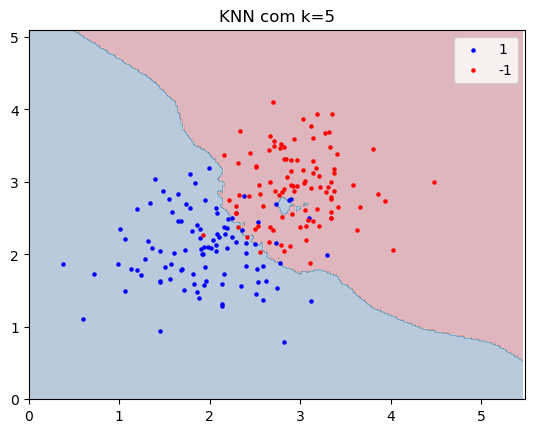

In [235]:
knn_grid_map(X, knn, 5)

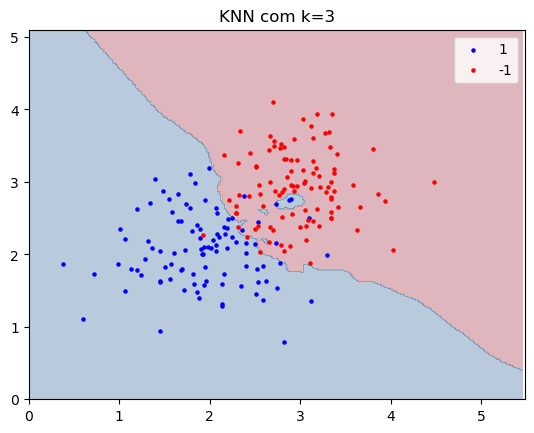

In [236]:
knn_grid_map(X, knn, 3)

Neste exemplo, o número de vizinhos contados no algoritmo foi alterado e a região de decisão do classificador foi plotada. 
Podemos ver que, ao aumentar o número de vizinhos, a região de decisão se torna mais suave, enquanto que ao diminuir o número de vizinhos, a região de decisão se torna mais complexa, rodeando os pontos de dado.

Portanto, podemos dizer que o KNN tende ao overfitting com K muito pequeno, enquanto tende ao underfitting com K muito grande, sendo necessário encontrar um K ótimo que generalize bem os dados de treinamento. 

No exemplo mostrado, k = 11 demonstrou generalização satisfatória, uma vez que sua região de contorno não foi complexa em volta dos dados e nem ignorou a presença deles.